In [13]:
import numpy as np
import matplotlib.pyplot as plt

## days_infectious

Logic:
Consider the start of an infection.  This occurs between two surveillance testing days.  Let T be the distance in time between these two sampling days.  We will suppose that the start of the infection is uniformly distributed between 0 and T.  Call this time X.  We assume that the person is infectious for the whole time that they are PCR-detectable at a constant rate.  Let R be the length of this infectious period.  Let D be the delay from sampling to acting on the result by isolating the person.

Then the number of days when the person is infectious is min(T+D-X, R).

We can rewrite this as D + min(T-X,R-D) = D + T * min((T-X)/T, (R-D)/T)

U = (T-X)/T is uniformly distributed between 0 and 1.
Let b = (R-D)/T.  Let's compute y = E[min(U,b)].

If b <= 0 then y = b
If b > 1, this is 1/2.
If b in (0,1), this is b*(1-b/2), according to a pencil & paper calculation

So we'll return D + T * y

In [41]:
def days_infectious(days_between_tests, infectious_days, result_delay):
    # Returns the number of days when a person is infectious, 
    # given the number of days between tests, 
    # the number of days from sampling to resulting, 
    # and the length of the infectious period.
    # Pass days_between_tests = np.inf to model not testing
    T = days_between_tests
    D = result_delay
    R = infectious_days
    
    assert T > 0
    
    if T == np.inf:
        return infectious_days
    
    b = (R-D)/T
    if b < 0:
        y = 0
    elif b > 1:
        y = 0.5
    else:
        y = b*(1-0.5*b)
        
    return D + T * y

### Testing

In [10]:
# Testing
days_infectious(7,5,1)

3.857142857142857

In [40]:
days_infectious(np.inf,5,1)

5

Text(0, 0.5, 'Expected Days infectious')

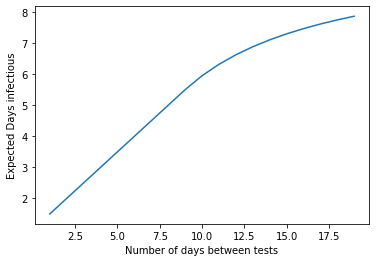

In [20]:
days_between_tests = np.arange(1,20,1)
y = [days_infectious(d,10,1) for d in days_between_tests]
plt.plot(days_between_tests,y)
plt.xlabel('Number of days between tests')
plt.ylabel('Expected Days infectious')

## herd_immunity

In [29]:
def herd_immunity(transmissions_per_day,
                  days_between_tests, infectious_days, result_delay):
    '''
    Calculates the fraction of the population that would be infected
    before we reach herd immunity.
    
    Assumptions:
    - Ignores the effect of contact tracing
    - Assumptions in days_infectious
    - Ignores infections that happen after we reach herd immunity
    - Ignores outside infections
    
    Logic:
    The number of people infected by an index case in a fully susceptible 
    population is effective_R0 = days_infectious * transmissions_per_day
    
    When S is the fraction that are susceptible,
    the number infected by an index case is
    S * effective_R0
    
    When effective_R0 is > 1, the value of S that makes this <=1
    (i.e., at which we reach herd immunity)
    is S = 1 / effective_R0,
    so the number infected or recovered at this point is 
    1-S = 1 - 1/effective_R0
    
    When effective_R0 is <= 1, the value of S that makes this <=1 is S=1,
    i.e., we were already at herd immunity when the population was 
    fully susceptible, and the fraction infected / recovered is 0.
    
    '''
    
    effective_R0 = transmissions_per_day * days_infectious(days_between_tests, infectious_days, result_delay)
    assert effective_R0 >= 0
    
    if effective_R0 < 1:
        return 0
    else:
        return 1 - 1./effective_R0

### Testing

Text(0.5, 1.0, 'infectious_days=10 result_delay=1')

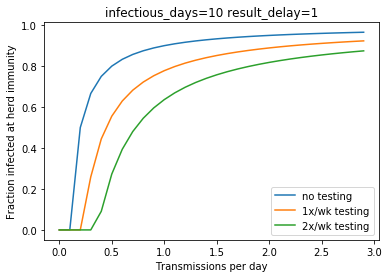

In [52]:
infectious_days = 10
result_delay = 1

transmissions_per_day = np.arange(0,3,0.1)

# 1 week / 7 days between tests
y1 = [herd_immunity(t,7,infectious_days,result_delay)
     for t in transmissions_per_day]

y2 = [herd_immunity(t,7./2,infectious_days,result_delay)
     for t in transmissions_per_day]

y0 = [herd_immunity(t,np.inf,infectious_days,result_delay)
     for t in transmissions_per_day]

plt.plot(transmissions_per_day,y0, \
         transmissions_per_day,y1, \
         transmissions_per_day,y2)
plt.xlabel('Transmissions per day')
plt.ylabel('Fraction infected at herd immunity')
plt.legend(['no testing','1x/wk testing', '2x/wk testing'])
plt.title('infectious_days={} result_delay={}'.format(infectious_days, result_delay))

Text(0.5, 1.0, 'asymptomatic_rate = 0.6, infectious_days=10, result_delay=1')

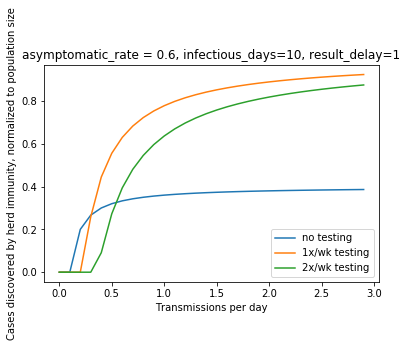

In [55]:
asymptomatic_rate = 0.6

infectious_days = 10
result_delay = 1

transmissions_per_day = np.arange(0,3,0.1)

# 1 week / 7 days between tests
y1 = [herd_immunity(t,7,infectious_days,result_delay)
     for t in transmissions_per_day]

y2 = [herd_immunity(t,7./2,infectious_days,result_delay)
     for t in transmissions_per_day]

# If we aren't testing, then only the symptomatic people are discovered
y0 = [(1-asymptomatic_rate) * herd_immunity(t,np.inf,infectious_days,result_delay)
     for t in transmissions_per_day]

plt.plot(transmissions_per_day,y0, \
         transmissions_per_day,y1, \
         transmissions_per_day,y2)
plt.xlabel('Transmissions per day')
plt.ylabel('Cases discovered by herd immunity, normalized to population size')
plt.legend(['no testing','1x/wk testing', '2x/wk testing'])
plt.title('asymptomatic_rate = {}, infectious_days={}, result_delay={}'.format(\
        asymptomatic_rate, infectious_days, result_delay))

Text(0.5, 1.0, 'transmissions_per_day=0.5, asymptomatic_rate=0.6, infectious_days=10, result_delay=1')

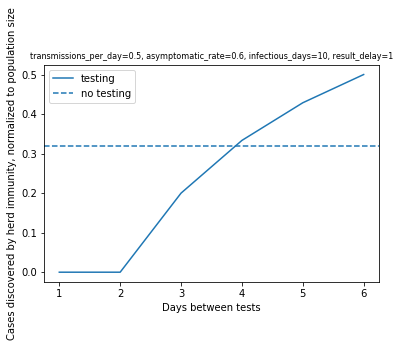

In [68]:
asymptomatic_rate = 0.6
infectious_days = 10
result_delay = 1
transmissions_per_day = 0.5

days_between_tests = np.arange(1,7)

# 0.5 transmissions per day
y1 = [herd_immunity(0.5,t,infectious_days,result_delay)
     for t in days_between_tests]

# If we aren't testing, then only the symptomatic people are discovered
z1 = (1-asymptomatic_rate) * \
    herd_immunity(0.5,np.inf,infectious_days,result_delay)

plt.plot(days_between_tests,y1)
plt.axhline(z1,ls = '--')

plt.xlabel('Days between tests')
plt.ylabel('Cases discovered by herd immunity, normalized to population size')
plt.legend(['testing','no testing'])
plt.title('transmissions_per_day={}, asymptomatic_rate={}, infectious_days={}, result_delay={}'.format(\
        transmissions_per_day, asymptomatic_rate, infectious_days, result_delay),\
         fontsize=8)



# Number of infections discovered

In [77]:
def num_discovered_one_pop(n_contacts_per_day = 8.3, num_people = 16000, \
                   p_transmission= 0.1, days_between_tests=7, asymptomatic_rate = 0.6):

    # p_transmission is the probability of transmission per contact
    transmissions_per_day = p_transmission * n_contacts_per_day
    
    fraction_infected = \
        herd_immunity(transmissions_per_day, days_between_tests, \
        infectious_days, result_delay)

    num_infected = fraction_infected * num_people

    if days_between_tests == np.inf:
        return num_infected * (1-asymptomatic_rate)
    else:
        return num_infected

In [87]:
def num_discovered(contacts_per_day, num_people, \
                   p_transmission= 0.1, days_between_tests=7, asymptomatic_rate = 0.6):

    total = 0
    for i in range(len(contacts_per_day)):
        total += num_discovered_one_pop(contacts_per_day[i],num_people[i], \
                                p_transmission, days_between_tests, asymptomatic_rate)
        
    return total

In [88]:
contacts_per_day = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
num_people = np.ones(len(contacts_per_day))*21000/len(contacts_per_day)
num_discovered(contacts_per_day, num_people)

10131.481481481482

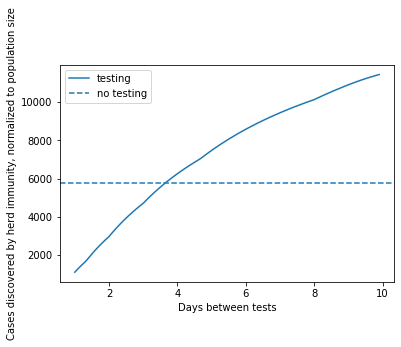

In [107]:
contacts_per_day = np.arange(1,10)
num_people = np.ones(len(contacts_per_day))*21000/len(contacts_per_day)

days_between_tests = np.arange(1,10,.1)
y = [num_discovered(contacts_per_day, num_people, days_between_tests = t)
     for t in days_between_tests]

z = num_discovered(contacts_per_day, num_people, days_between_tests = np.inf)

plt.plot(days_between_tests,y)
plt.axhline(z,ls = '--')

plt.xlabel('Days between tests')
plt.ylabel('Cases discovered by herd immunity, normalized to population size')
plt.legend(['testing','no testing'])

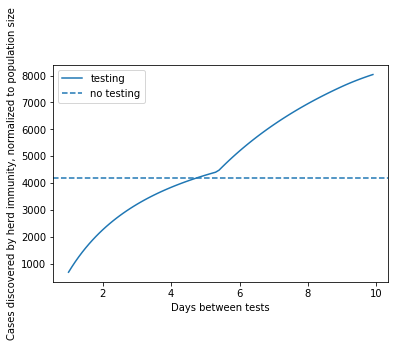

In [106]:
contacts_per_day = np.exp(np.arange(0,np.log(10)))
num_people = np.ones(len(contacts_per_day))*21000/len(contacts_per_day)

days_between_tests = np.arange(1,10,.1)
y = [num_discovered(contacts_per_day, num_people, days_between_tests = t)
     for t in days_between_tests]

z = num_discovered(contacts_per_day, num_people, days_between_tests = np.inf)

plt.plot(days_between_tests,y)
plt.axhline(z,ls = '--')

plt.xlabel('Days between tests')
plt.ylabel('Cases discovered by herd immunity, normalized to population size')
plt.legend(['testing','no testing'])